In [1]:
from scipy.stats.distributions import chi2

import matplotlib.pylab as plt
import json
import pandas as pd
import os
import seaborn as sns
import numpy as np

import itertools
import random
import copy
import time

# Analyzing Examples

# Example 1
Data are generated by running the WebPPL example in a browser and then downloading the resulting JSON.

In [2]:
ex1_sim_results = [
  {"Speaker": "Belief-Only\n($\lambda=0$)", "World": "Open", "Probability": 0.49999998763307907},
  {"Speaker": "Belief-Only\n($\lambda=0$)", "World": "Closed", "Probability": 0.4999999876330782},
  {"Speaker": "Belief-Only\n($\lambda=0$)", "World": "None", "Probability": 2.4733842721552372e-8},

  {"Speaker": "Combined\n($\lambda=.5$)", "World": "Open", "Probability":0.9182656837512339},
  {"Speaker": "Combined\n($\lambda=.5$)", "World": "Closed", "Probability": 0.08167109804637465},
  {"Speaker": "Combined\n($\lambda=.5$)", "World": "None", "Probability": 0.00006321820239158504}, 

]

ex1_df = pd.DataFrame(ex1_sim_results)
ex1_df

,Speaker,World,Probability
0,Belief-Only\n($\lambda=0$),Open,5.000000e-01
1,Belief-Only\n($\lambda=0$),Closed,5.000000e-01
2,Belief-Only\n($\lambda=0$),None,2.473384e-08
3,Combined\n($\lambda=.5$),Open,9.182657e-01
4,Combined\n($\lambda=.5$),Closed,8.167110e-02
5,Combined\n($\lambda=.5$),None,6.321820e-05


# Example 2
Data are generated by running the WebPPL example in a browser and then downloading the resulting JSON.

In [3]:
ex2_sim_results = [
  {"Speaker": "Belief-Only\n($\lambda=0$)", "World": "5:00", "Probability": 0.9999546021312976},
  {"Speaker": "Belief-Only\n($\lambda=0$)", "World": "5:05", "Probability": 0.000045397868702434354},
    {"Speaker": "Combined\n($\lambda=.9$)", "World": "5:00", "Probability": 0.7794655668133676},
  {"Speaker": "Combined\n($\lambda=.9$)", "World": "5:05", "Probability": 0.2205344331866323},
]

ex2_df = pd.DataFrame(ex2_sim_results)
ex2_df

,Speaker,World,Probability
0,Belief-Only\n($\lambda=0$),5:00,0.999955
1,Belief-Only\n($\lambda=0$),5:05,0.000045
2,Combined\n($\lambda=.9$),5:00,0.779466
3,Combined\n($\lambda=.9$),5:05,0.220534


/Users/sumers/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


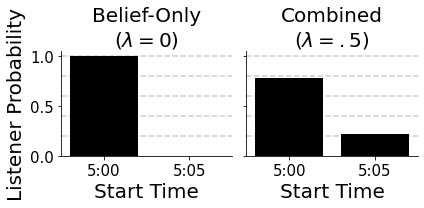

In [4]:
g = sns.FacetGrid(ex2_df, col="Speaker")
g.map(sns.barplot,'World','Probability', palette=['k'])

for i, ax in enumerate(g.axes.flat):
    for y in [.2, .4, .6, .8, 1]:
        ax.axhline(y, linestyle='--', c='k', zorder=0, alpha=.2)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel('Start Time', fontsize=20)
    if i == 0:
        ax.set_ylabel('Listener Probability', fontsize=20)
        ax.set_title('Belief-Only\n($\lambda=0$)', fontsize=20)
    else:
        ax.set_title('Combined\n($\lambda=.5$)', fontsize=20)

        plt.tight_layout()

/Users/sumers/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


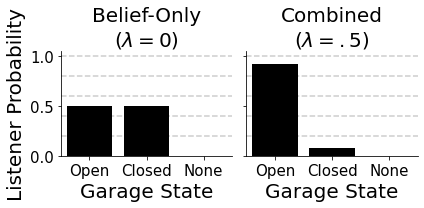

In [5]:
g = sns.FacetGrid(ex1_df, col="Speaker")
g.map(sns.barplot,'World','Probability', palette=['k'])

for i, ax in enumerate(g.axes.flat):
    for y in [.2, .4, .6, .8, 1]:
        ax.axhline(y, linestyle='--', c='k', zorder=0, alpha=.2)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlabel('Garage State', fontsize=20)
    if i == 0:
        ax.set_ylabel('Listener Probability', fontsize=20)
        ax.set_title('Belief-Only\n($\lambda=0$)', fontsize=20)
    else:
        ax.set_title('Combined\n($\lambda=.5$)', fontsize=20)

        plt.tight_layout()


# Example 3

Data are generated by running the WebPPL script locally via this notebook.

In [6]:
def load_results(raw_json):
    
    all_results = []
    for d in raw_json:
        res = copy.deepcopy(d['results'])
        for time, prob in zip(res['support'], res['probs']):
            res_copy = copy.deepcopy(d)
            del res_copy['results']
            res_copy.update({'response_time': time, 'prob': prob})
            all_results.append(res_copy)
    
    return pd.DataFrame(all_results)

In [7]:
ex3_path = 'javascript/analysis/ex3-telling_the_time.wppl'
script = '{} --require webppl-json'.format(ex3_path)

!webppl {script}

undefined


In [8]:
data = json.load(open('ex3-results-regular.json'))
df_regular = load_results(data)
df_regular['context'] = 'Model - Control'

data = json.load(open('ex3-results-watch-setting.json'))
df_watch = load_results(data)
df_watch['context'] = 'Model - Watch'

In [9]:
df = pd.concat([df_regular, df_watch])
df['5x_resp'] = df.response_time % 5 == 0
df['lambda'] = df['lambda'].round(2)

In [10]:
multiples_by_params = df.groupby(['alpha', 'lambda', 'context', '5x_resp']).prob.sum() / 5

summary_df = multiples_by_params.reset_index()
summary_df = summary_df.rename({'prob':'pct_5x'}, axis=1)

In [11]:
mult_of_five = summary_df[summary_df['5x_resp']]
mult_of_five['pct_rounders'] = (mult_of_five['pct_5x'] - .2)/(.8)

/var/folders/gv/42lb0z1j4dxf3wsk74nrxwx80000gn/T/ipykernel_47753/3371046775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mult_of_five['pct_rounders'] = (mult_of_five['pct_5x'] - .2)/(.8)


Text(0, 0.5, 'Percent of \n Rounded Responses')

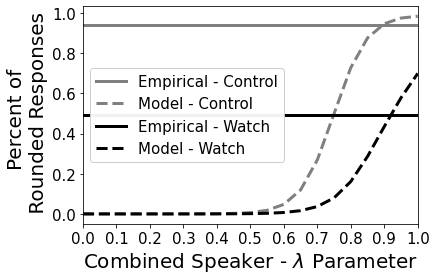

In [12]:
ax = sns.lineplot(data=mult_of_five, x='lambda', y='pct_rounders', hue='context', 
             palette=['gray', 'k'], linewidth=3, linestyle='--')

ax.axhline(.94, c='gray', label='Empirical - Control', linewidth=3)
ax.axhline(.49, c='k', label='Empirical - Watch', linewidth=3)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2,0,3,1]

#add legend to plot
leg = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
                 loc=6, fontsize=15, framealpha=.95) 

# leg = plt.legend()

leg.get_lines()[1].set_linewidth(3)
leg.get_lines()[1].set_linestyle('--')
leg.get_lines()[3].set_linewidth(3)
leg.get_lines()[3].set_linestyle('--')

plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.1, step=0.1), fontsize=15);
plt.yticks(np.arange(0, 1.1, step=0.2), fontsize=15);

plt.gca().set_xlabel("Combined Speaker - $\lambda$ Parameter", size=20)
plt.gca().set_ylabel("Percent of \n Rounded Responses", size=20)

In [13]:
results = mult_of_five[mult_of_five['lambda'].isin([0, .9])]


results['Context'] = results.context.apply(lambda x: x.split(' ')[-1])
results['Speaker'] = results['lambda'].apply(lambda x: "Belief-Only\n($\lambda=0$)" if x == 0 else "Combined\n($\lambda=.9$)")

empirical_data = [{"Context": "Control", "Speaker": "Humans\n(empirical)", "pct_5x": .955, "pct_rounders": .94},
                  {"Context": "Watch", "Speaker": "Humans\n(empirical)", "pct_5x": .595, "pct_rounders": .49}]

full_results = pd.concat([results, pd.DataFrame(empirical_data)])

/var/folders/gv/42lb0z1j4dxf3wsk74nrxwx80000gn/T/ipykernel_47753/1426694180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Context'] = results.context.apply(lambda x: x.split(' ')[-1])
/var/folders/gv/42lb0z1j4dxf3wsk74nrxwx80000gn/T/ipykernel_47753/1426694180.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Speaker'] = results['lambda'].apply(lambda x: "Belief-Only\n($\lambda=0$)" if x == 0 else "Combined\n($\lambda=.9$)")


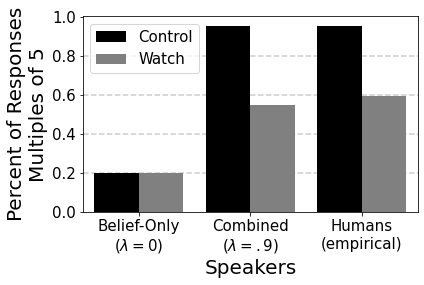

In [14]:
sns.barplot(data=full_results, x='Speaker', hue='Context', y='pct_5x', palette=['k', 'gray'])
plt.legend(fontsize=15)
plt.xlabel("Speakers", fontsize=20)
plt.ylabel("Percent of Responses\nMultiples of 5", fontsize=20)

plt.gca().tick_params(axis='both', labelsize=15)

for y in [.2, .4, .6, .8]:
    plt.axhline(y, c='k', alpha=.2, zorder=0, linestyle='--')

plt.tight_layout()
